In [1]:
from matminer.datasets import load_dataset
df = load_dataset('elastic_tensor_2015',data_home = '.')
df.head()

,material_id,formula,nsites,space_group,volume,structure,elastic_anisotropy,G_Reuss,G_VRH,G_Voigt,K_Reuss,K_VRH,K_Voigt,poisson_ratio,compliance_tensor,elastic_tensor,elastic_tensor_original,cif,kpoint_density,poscar
0,mp-10003,Nb4CoSi,12,124,194.419802,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,96.844535,97.141604,97.438674,194.267623,194.268884,194.270146,0.285701,"[[0.004385293093993, -0.0016070693558990002, -...","[[311.33514638650246, 144.45092552856926, 126....","[[311.33514638650246, 144.45092552856926, 126....",#\#CIF1.1\n###################################...,7000,Nb8 Co2 Si2\n1.0\n6.221780 0.000000 0.000000\n...
1,mp-10010,Al(CoSi)2,5,164,61.987320,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,93.939650,96.252006,98.564362,173.647763,175.449907,177.252050,0.268105,"[[0.0037715428949660003, -0.000844229828709, -...","[[306.93357350984974, 88.02634955100905, 105.6...","[[306.93357350984974, 88.02634955100905, 105.6...",#\#CIF1.1\n###################################...,7000,Al1 Co2 Si2\n1.0\n3.932782 0.000000 0.000000\n...
2,mp-10015,SiOs,2,221,25.952539,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,120.962289,130.112955,139.263621,295.077545,295.077545,295.077545,0.307780,"[[0.0019959391925840004, -0.000433146670736000...","[[569.5291276937579, 157.8517489654999, 157.85...","[[569.5291276937579, 157.8517489654999, 157.85...",#\#CIF1.1\n###################################...,7000,Si1 Os1\n1.0\n2.960692 0.000000 0.000000\n0.00...
3,mp-10021,Ga,4,63,76.721433,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,12.205989,15.101901,17.997812,49.025963,49.130670,49.235377,0.360593,"[[0.021647143908635, -0.005207263618160001, -0...","[[69.28798774976904, 34.7875015216915, 37.3877...","[[70.13259066665267, 40.60474945058445, 37.387...",#\#CIF1.1\n###################################...,7000,Ga4\n1.0\n2.803229 0.000000 0.000000\n0.000000...
4,mp-10025,SiRu2,12,62,160.300999,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,100.110773,101.947798,103.784823,255.055257,256.768081,258.480904,0.324682,"[[0.00410214297725, -0.001272204332729, -0.001...","[[349.3767766177825, 186.67131003104407, 176.4...","[[407.4791016459293, 176.4759188081947, 213.83...",#\#CIF1.1\n###################################...,7000,Si4 Ru8\n1.0\n4.037706 0.000000 0.000000\n0.00...


In [2]:
df.columns

Index(['material_id', 'formula', 'nsites', 'space_group', 'volume',
       'structure', 'elastic_anisotropy', 'G_Reuss', 'G_VRH', 'G_Voigt',
       'K_Reuss', 'K_VRH', 'K_Voigt', 'poisson_ratio', 'compliance_tensor',
       'elastic_tensor', 'elastic_tensor_original', 'cif', 'kpoint_density',
       'poscar'],
      dtype='object')

df = df['cif','kpoint_density']

In [3]:
unwanted_columns = ['volume','nsites','compliance_tensor','elastic_tensor',
                   'elastic_tensor_original','G_Reuss','G_Voigt','K_Reuss',
                    'K_Voigt','cif','kpoint_density','poscar']
df = df.drop(unwanted_columns, axis = 1)
df.head()

,material_id,formula,space_group,structure,elastic_anisotropy,G_VRH,K_VRH,poisson_ratio
0,mp-10003,Nb4CoSi,124,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,97.141604,194.268884,0.285701
1,mp-10010,Al(CoSi)2,164,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,96.252006,175.449907,0.268105
2,mp-10015,SiOs,221,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,130.112955,295.077545,0.307780
3,mp-10021,Ga,63,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,15.101901,49.130670,0.360593
4,mp-10025,SiRu2,62,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,101.947798,256.768081,0.324682


In [4]:
df.describe()

,space_group,elastic_anisotropy,G_VRH,K_VRH,poisson_ratio
count,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,163.403895,2.145013,67.543145,136.259661,0.287401
std,65.040733,19.140097,44.579408,72.886978,0.062177
min,4.000000,0.000005,2.722175,6.476135,0.042582
25%,124.000000,0.145030,34.117959,76.435350,0.249159
50%,193.000000,0.355287,59.735163,130.382766,0.290198
75%,221.000000,0.923117,91.332142,189.574194,0.328808
max,229.000000,397.297866,522.921225,435.661487,0.467523


In [5]:
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, 'formula')
df.head()

StrToComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

,material_id,formula,space_group,structure,elastic_anisotropy,G_VRH,K_VRH,poisson_ratio,composition
0,mp-10003,Nb4CoSi,124,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,97.141604,194.268884,0.285701,"(Nb, Co, Si)"
1,mp-10010,Al(CoSi)2,164,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,96.252006,175.449907,0.268105,"(Al, Co, Si)"
2,mp-10015,SiOs,221,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,130.112955,295.077545,0.307780,"(Si, Os)"
3,mp-10021,Ga,63,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,15.101901,49.130670,0.360593,(Ga)
4,mp-10025,SiRu2,62,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,101.947798,256.768081,0.324682,"(Si, Ru)"


In [6]:
from matminer.featurizers.composition import ElementProperty
ep_feat = ElementProperty.from_preset(preset_name = 'magpie')
df = ep_feat.featurize_dataframe(df, col_id = 'composition')
df.head()

ElementProperty:   0%|          | 0/1181 [00:00<?, ?it/s]

,material_id,formula,space_group,structure,elastic_anisotropy,G_VRH,K_VRH,poisson_ratio,composition,MagpieData minimum Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,mp-10003,Nb4CoSi,124,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,97.141604,194.268884,0.285701,"(Nb, Co, Si)",14.0,...,1.548471,0.258079,0.430131,0.0,194.0,229.0,35.0,222.833333,9.611111,229.0
1,mp-10010,Al(CoSi)2,164,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,96.252006,175.449907,0.268105,"(Al, Co, Si)",13.0,...,1.548471,0.619388,0.743266,0.0,194.0,227.0,33.0,213.400000,15.520000,194.0
2,mp-10015,SiOs,221,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,130.112955,295.077545,0.307780,"(Si, Os)",14.0,...,0.000000,0.000000,0.000000,0.0,194.0,227.0,33.0,210.500000,16.500000,194.0
3,mp-10021,Ga,63,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,15.101901,49.130670,0.360593,(Ga),31.0,...,0.000000,0.000000,0.000000,0.0,64.0,64.0,0.0,64.000000,0.000000,64.0
4,mp-10025,SiRu2,62,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,101.947798,256.768081,0.324682,"(Si, Ru)",14.0,...,0.000000,0.000000,0.000000,0.0,194.0,227.0,33.0,205.000000,14.666667,194.0


In [7]:
help(ElementProperty.from_preset)

Help on method from_preset in module matminer.featurizers.composition.composite:

from_preset(preset_name) method of abc.ABCMeta instance
    Return ElementProperty from a preset string
    Args:
        preset_name: (str) can be one of "magpie", "deml", "matminer",
            "matscholar_el", or "megnet_el".
    
    Returns:
        ElementProperty based on the preset name.



In [8]:
from matminer.featurizers.conversions import CompositionToOxidComposition
from matminer.featurizers.composition import OxidationStates

In [9]:
df = CompositionToOxidComposition().featurize_dataframe(df, 'composition')

os_feat = OxidationStates()
df = os_feat.featurize_dataframe(df, 'composition_oxid')
df.head()

CompositionToOxidComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

OxidationStates:   0%|          | 0/1181 [00:00<?, ?it/s]

,material_id,formula,space_group,structure,elastic_anisotropy,G_VRH,K_VRH,poisson_ratio,composition,MagpieData minimum Number,...,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state
0,mp-10003,Nb4CoSi,124,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,97.141604,194.268884,0.285701,"(Nb, Co, Si)",14.0,...,229.0,35.0,222.833333,9.611111,229.0,"(Nb0+, Co0+, Si0+)",0,0,0,0.000000
1,mp-10010,Al(CoSi)2,164,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,96.252006,175.449907,0.268105,"(Al, Co, Si)",13.0,...,227.0,33.0,213.400000,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)",-4,3,7,3.872983
2,mp-10015,SiOs,221,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,130.112955,295.077545,0.307780,"(Si, Os)",14.0,...,227.0,33.0,210.500000,16.500000,194.0,"(Si4-, Os4+)",-4,4,8,5.656854
3,mp-10021,Ga,63,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,15.101901,49.130670,0.360593,(Ga),31.0,...,64.0,0.0,64.000000,0.000000,64.0,(Ga0+),0,0,0,0.000000
4,mp-10025,SiRu2,62,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,101.947798,256.768081,0.324682,"(Si, Ru)",14.0,...,227.0,33.0,205.000000,14.666667,194.0,"(Si4-, Ru2+)",-4,2,6,4.242641


In [10]:
from matminer.featurizers.structure import DensityFeatures

df_feat = DensityFeatures()
df = df_feat.featurize_dataframe(df, 'structure')
df.head()

DensityFeatures:   0%|          | 0/1181 [00:00<?, ?it/s]

,material_id,formula,space_group,structure,elastic_anisotropy,G_VRH,K_VRH,poisson_ratio,composition,MagpieData minimum Number,...,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,density,vpa,packing fraction
0,mp-10003,Nb4CoSi,124,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,97.141604,194.268884,0.285701,"(Nb, Co, Si)",14.0,...,9.611111,229.0,"(Nb0+, Co0+, Si0+)",0,0,0,0.000000,7.834556,16.201654,0.688834
1,mp-10010,Al(CoSi)2,164,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,96.252006,175.449907,0.268105,"(Al, Co, Si)",13.0,...,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)",-4,3,7,3.872983,5.384968,12.397466,0.644386
2,mp-10015,SiOs,221,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,130.112955,295.077545,0.307780,"(Si, Os)",14.0,...,16.500000,194.0,"(Si4-, Os4+)",-4,4,8,5.656854,13.968635,12.976265,0.569426
3,mp-10021,Ga,63,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,15.101901,49.130670,0.360593,(Ga),31.0,...,0.000000,64.0,(Ga0+),0,0,0,0.000000,6.036267,19.180359,0.479802
4,mp-10025,SiRu2,62,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,101.947798,256.768081,0.324682,"(Si, Ru)",14.0,...,14.666667,194.0,"(Si4-, Ru2+)",-4,2,6,4.242641,9.539514,13.358418,0.598395


In [11]:
df_feat.feature_labels()

['density', 'vpa', 'packing fraction']

In [12]:
y = df['K_VRH'].values

In [13]:
excluded = ['G_VRH','K_VRH','elastic_anisotropy','poisson_ratio',
           'formula','material_id','structure','composition',
            'composition_oxid']
X = df.drop(excluded, axis = 1)

In [14]:
print('There are %s possible descriptor: \n %s'%(X.shape[1], X.columns.values))

There are 140 possible descriptor: 
 ['space_group' 'MagpieData minimum Number' 'MagpieData maximum Number'
 'MagpieData range Number' 'MagpieData mean Number'
 'MagpieData avg_dev Number' 'MagpieData mode Number'
 'MagpieData minimum MendeleevNumber' 'MagpieData maximum MendeleevNumber'
 'MagpieData range MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData avg_dev MendeleevNumber' 'MagpieData mode MendeleevNumber'
 'MagpieData minimum AtomicWeight' 'MagpieData maximum AtomicWeight'
 'MagpieData range AtomicWeight' 'MagpieData mean AtomicWeight'
 'MagpieData avg_dev AtomicWeight' 'MagpieData mode AtomicWeight'
 'MagpieData minimum MeltingT' 'MagpieData maximum MeltingT'
 'MagpieData range MeltingT' 'MagpieData mean MeltingT'
 'MagpieData avg_dev MeltingT' 'MagpieData mode MeltingT'
 'MagpieData minimum Column' 'MagpieData maximum Column'
 'MagpieData range Column' 'MagpieData mean Column'
 'MagpieData avg_dev Column' 'MagpieData mode Column'
 'MagpieData minimum Row' 'Magpi

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [16]:
lr = LinearRegression()
lr.fit(X,y)

print('training R2 = '+ str(round(lr.score(X, y), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true = y,
                                                          y_pred = lr.predict(X))))

training R2 = 0.926
training RMSE = 19.773


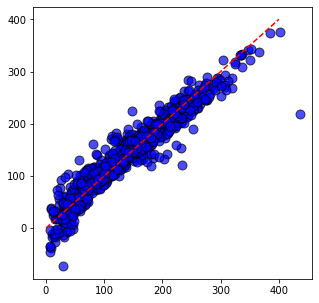

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
plt.plot([0,400],[0,400],'r--')
plt.scatter(y, lr.predict(X), s = 80, c = 'b', edgecolor = 'k',
           alpha = 0.7)

In [23]:
from sklearn.model_selection import KFold,cross_val_score

crossvalidation = KFold(n_splits = 10, shuffle=True, random_state = 1)
scores = cross_val_score(lr, X, y, scoring = 'neg_mean_squared_error',
                        cv = crossvalidation, n_jobs = 1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]

print('cross-validation results:')
print('Folds: %i, mean RMSE: %.3f' %(len(scores), np.mean(rmse_scores)))

cross-validation results:
Folds: 10, mean RMSE: 22.388


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 50, random_state = 1)
rf.fit(X, y)

print('training R2 = ' + str(round(rf.score(X, y),3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true = y,
                                                         y_pred = rf.predict(X))) )

training R2 = 0.989
training RMSE = 7.687


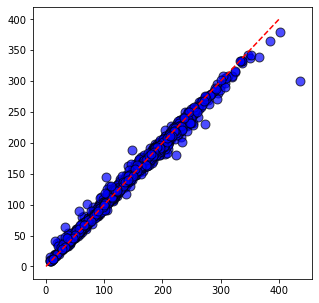

In [30]:
plt.figure(figsize=(5,5))
plt.plot([0,400],[0,400],'r--')
plt.scatter(y,rf.predict(X), s= 80, c = 'b', edgecolor = 'k',alpha = 0.7)

In [32]:
crossvalidation = KFold(n_splits = 10, shuffle=True, random_state = 1)

r2_scores = cross_val_score(rf,X, y, scoring = 'r2', cv = crossvalidation,
                            n_jobs = 2)
scores = cross_val_score(rf, X, y, scoring = 'neg_mean_squared_error',
                        cv = crossvalidation, n_jobs = 1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]

print('cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(r2_scores), np.mean(r2_scores)))
print('Folds: %i, mean RMSE: %.3f' %(len(scores), np.mean(rmse_scores)))

cross-validation results:
Folds: 10, mean R2: 0.924
Folds: 10, mean RMSE: 19.277


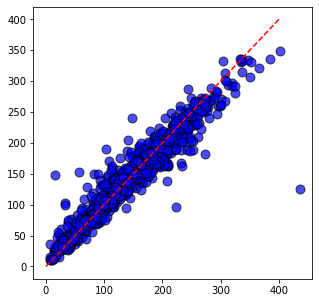

In [34]:
from sklearn.model_selection import cross_val_predict
plt.figure(figsize=(5,5))
plt.plot([0,400],[0,400],'r--')
plt.scatter(y, cross_val_predict(rf, X, y, cv = crossvalidation), s = 80,
           c = 'b', edgecolor = 'k', alpha = 0.7)

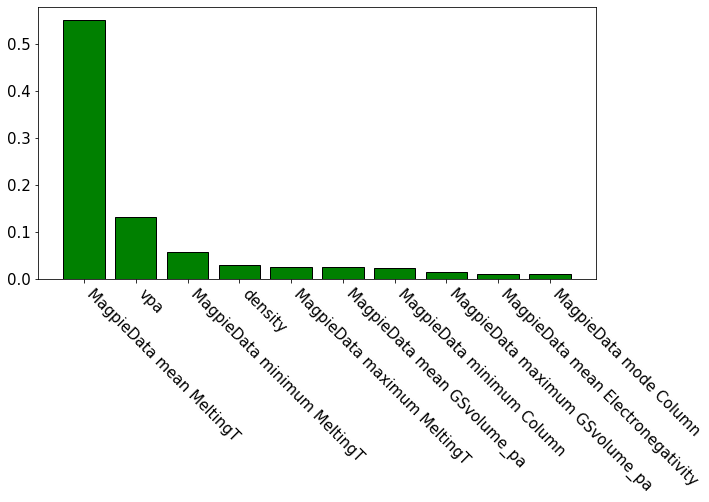

In [44]:
importances = rf.feature_importances_
included = X.columns.values
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.bar(x = included[indices][0:10], height = importances[indices][0:10],
       color = 'g', edgecolor = 'k')
plt.xticks(rotation = -45, fontsize = 15, ha='left')
plt.yticks(fontsize = 15)
plt.show()

In [40]:
a = [1,5,3,6,2]
b = np.argsort(a)[::1]
c = np.argsort(a)[::2]
d = np.argsort(a)[::-1]
print(b)
print(c)
print(d)

[0 4 2 1 3]
[0 2 3]
[3 1 2 4 0]
